# Agrupamento ou Clusterização

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=True)

X = X.loc[:, ['petal length (cm)', 'petal width (cm)']]

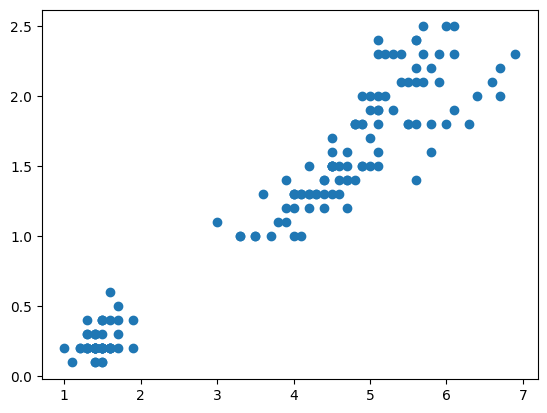

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: target, dtype: int32

In [5]:
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'])
plt.show()

In [12]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

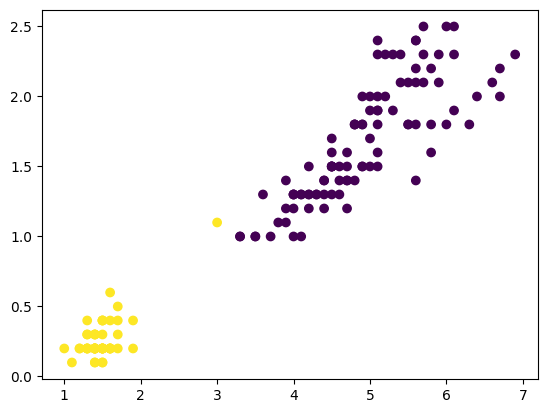

In [13]:
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans.labels_)
plt.show()

In [14]:
# Aqui é para saber quantos cluster é um valor bom para usar e clusterizar

valores_k = []
inercia = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(X)
    valores_k.append(i)
    inercia.append(kmeans.inertia_)
    print(kmeans.inertia_)

550.8953333333333
86.39021984551395
31.412885668276978
19.465989010989013
14.130893864755937
11.830278409090909
9.769354589496615
7.745948930296759
6.532504162646108
6.055955776249893
5.735141053391054
4.946741768035887
4.4036354299295475
3.969464424464424


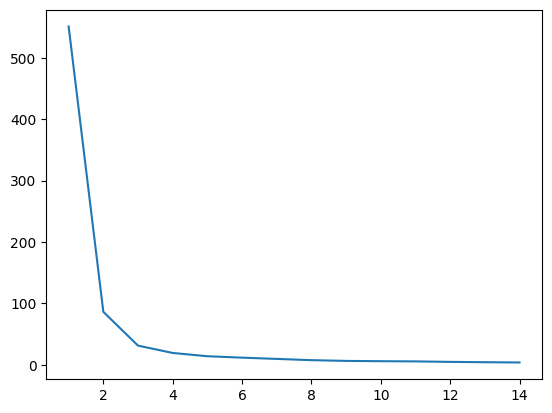

In [15]:
# Uma forma de ver os dados de cima é o gráfico de cotovelo para saber os valores em gráfico e ter uma noção da quantidade de cluster necessário

fig, ax = plt.subplots()
ax.plot(valores_k, inercia)
plt.show()

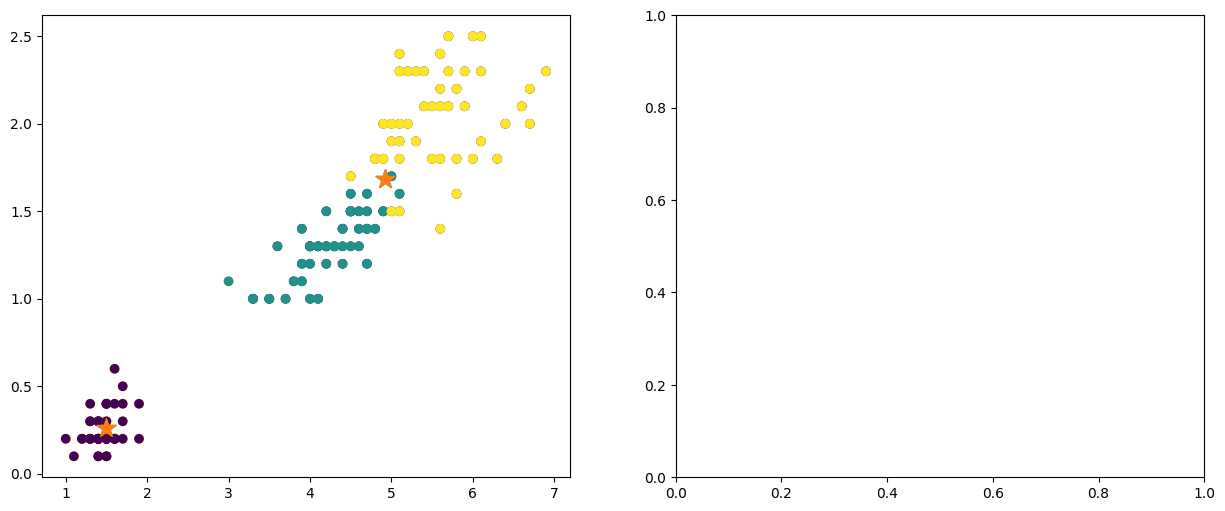

In [19]:
# Gráficos 

kmeans = KMeans(n_clusters=2, n_init='auto').fit(X)
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))
ax[0].scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans.labels_)
ax[0].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200)
ax[0].scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
plt.show()

Obs: Coeficiente Silhueta olha para dentro do cluster o Rand olha entre os cluster

Obs: Dá para usar KMeans em imagens

In [21]:
# Calcular o indice de Rand e o índice de Rand Ajustado. 

from sklearn import metrics

valores_k = []
ARI = []
RI = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(X)
    valores_k.append(i)
    RI.append(metrics.rand_score(y, kmeans.labels_))
    ARI.append(metrics.adjusted_rand_score(y, kmeans.labels_))


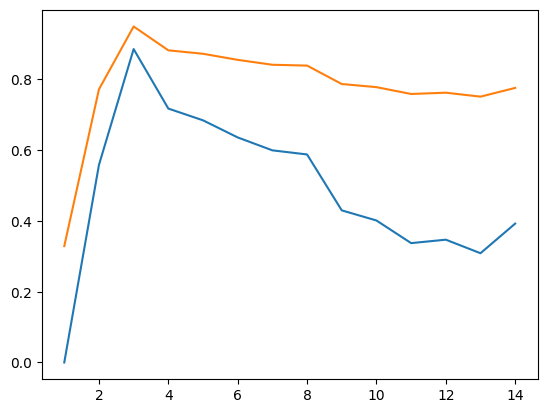

In [22]:
# Trazer em gráficos a comparação dos Rand
fig, ax = plt.subplots()
ax.plot(valores_k, ARI)
ax.plot(valores_k, RI)
plt.show()

In [ ]:
# Calcular o Coeficiente Silhueta


valores_k = []
S = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(X)
    valores_k.append(i)
    S.append(metrics.silhouette_score(X, kmeans.labels_))

In [ ]:
fig, ax = plt.subplots()
ax.plot(valores_k, S)
plt.show()

# Aplicação do kmeans em imagens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

image = cv2.imread('Selecao.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# 3 significa RGB e -1 Bidimensional
pixel_vals = image.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

In [ ]:
# os 50 aqui seria a quantidade interassões, ou seja, a quantidade máxima de vezes que o centroid irá se ajustar para cheagar média
# os 0.90 aqui seria o valor da media que o centroid deve atingir, que seria accuracy daqui
# e ou ele atingi um ou outro

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.90)
k = 30
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria ,10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)